In [7]:
import os
import sys
sys.path.append("../")
import re
import json
from osgeo import gdal
import importlib
import time
import datetime
import pprint
from scipy.spatial.distance import cdist
pp = pprint.PrettyPrinter(indent=4)
import helpers.vrt as vrt
import helpers.fmask as fmask
import numpy as np
import matplotlib.pyplot as plt
from helpers.variables import DATA_PATH

importlib.reload(vrt)
importlib.reload(fmask)

<module 'helpers.fmask' from '/Users/thomashebrard/thesis/code/preprocess/../helpers/fmask.py'>

In [8]:
# S2: 
s2 = {}
s2_root_path = f"{DATA_PATH}/s2/sre-10m/"
s2_paths = os.listdir(s2_root_path)
for path in s2_paths:
    current_dir = s2_root_path + path + "/"
    bands_file_names = os.listdir(current_dir)
    
    s2[path] = {
        "date": datetime.datetime.strptime(path.split("_")[-1], "%Y%m%d").strftime("%Y-%m-%d"),
        "bands_path": {band.split(".")[0].split("_")[-1]: current_dir + band for band in bands_file_names}
    }

with open("s2.json", "w") as f:
    json.dump(s2, f)

print(s2)

{'S2_32VNH_20190101': {'date': '2019-01-01', 'bands_path': {'B02': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B02.tif', 'B03': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B03.tif', 'B04': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B04.tif', 'B05': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B05.tif', 'B06': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B06.tif', 'B07': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B07.tif', 'B08': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B08.tif', 'B11': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B11.tif', 'B12': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B12.tif', 'B8A': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B8A.tif'}}

In [7]:
for sk, sv in s2.items():
    name = sk
    vrt.from_bands_to_vrt(bands=sv["bands_path"], name=name, rgb_vrt_path="data/vrt/s2/rgb", translate_vrt_path="data/vrt/s2/translate")

fail S2_32VNH_20190720 {'B02': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190720/S2_32VNH_20190720_B02.tif'}
fail S2_32VNH_20190818 {'B02': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190818/S2_32VNH_20190818_B02.tif'}
fail S2_32VNH_20190819 {'B02': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190819/S2_32VNH_20190819_B02.tif'}
fail S2_32VNH_20190829 {'B02': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190829/S2_32VNH_20190829_B02.tif'}
fail S2_32VNH_20190908 {'B02': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190908/S2_32VNH_20190908_B02.tif'}
fail S2_32VNH_20190910 {'B02': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190910/S2_32VNH_20190910_B02.tif'}
fail S2_32VNH_20190920 {'B02': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190920/S2_32VNH_20190920_B02.tif'}
fail S2_32VNH_20190925 {'B02': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190925/S2_32VNH_20190925_B02.tif'}
fail S2_32VNH_20190928 {'B02': '/Volumes/X/Data/fusion-s

In [9]:
# S1: 
s1 = {}
s1_root_path = f"{DATA_PATH}/s1db/32VNH/threeband/"
orbits = os.listdir(s1_root_path)

for orbit in orbits:
    orbit_path = s1_root_path + orbit
    paths = os.listdir(orbit_path)
    for path in paths:
        pattern = re.compile(r'^S1.*\.tif$')
        if pattern.match(path):
            s1[path] = {
                "date": datetime.datetime.strptime(path.split("_")[2], "%Y%m%d").strftime("%Y-%m-%d"),
                "orbit": orbit,
                "image_path": orbit_path + "/" + path
            }
        else:
            print(path)

with open("s1.json", "w") as f:
    json.dump(s1, f)
print(s1)

Thumbs.db
{'S1_32VNH_20190103_A_044.tif': {'date': '2019-01-03', 'orbit': '044', 'image_path': '/Volumes/X/Data/fusion-s1-s2/s1db/32VNH/threeband/044/S1_32VNH_20190103_A_044.tif'}, 'S1_32VNH_20190115_A_044.tif': {'date': '2019-01-15', 'orbit': '044', 'image_path': '/Volumes/X/Data/fusion-s1-s2/s1db/32VNH/threeband/044/S1_32VNH_20190115_A_044.tif'}, 'S1_32VNH_20190127_A_044.tif': {'date': '2019-01-27', 'orbit': '044', 'image_path': '/Volumes/X/Data/fusion-s1-s2/s1db/32VNH/threeband/044/S1_32VNH_20190127_A_044.tif'}, 'S1_32VNH_20190208_A_044.tif': {'date': '2019-02-08', 'orbit': '044', 'image_path': '/Volumes/X/Data/fusion-s1-s2/s1db/32VNH/threeband/044/S1_32VNH_20190208_A_044.tif'}, 'S1_32VNH_20190220_A_044.tif': {'date': '2019-02-20', 'orbit': '044', 'image_path': '/Volumes/X/Data/fusion-s1-s2/s1db/32VNH/threeband/044/S1_32VNH_20190220_A_044.tif'}, 'S1_32VNH_20190304_A_044.tif': {'date': '2019-03-04', 'orbit': '044', 'image_path': '/Volumes/X/Data/fusion-s1-s2/s1db/32VNH/threeband/044/

In [22]:
for sk, sv in s1.items():
    name = sk
    input_ds = gdal.Open(sv["image_path"], gdal.GA_ReadOnly)

    vrt_options = gdal.BuildVRTOptions(resolution='highest')
    gdal.BuildVRT(f"../data/vrt/s1/{name.split('.')[0]}.vrt", input_ds, options=vrt_options)

In [5]:
##### BY DATES #####

images_by_dates = {}

for v in s2.values():
    if v["date"] not in images_by_dates and datetime.datetime.strptime(v["date"], "%Y-%m-%d") <= datetime.datetime(2021, 4, 19):
        images_by_dates[v["date"]] = {}

for v in s1.values():
    if v["date"] not in images_by_dates and datetime.datetime.strptime(v["date"], "%Y-%m-%d") <= datetime.datetime(2021, 4, 19):
        images_by_dates[v["date"]] = {}        

for v in s2.values():
    if datetime.datetime.strptime(v["date"], "%Y-%m-%d") <= datetime.datetime(2021, 4, 19):
        for band_k, band_v in v["bands_path"].items():
            images_by_dates[v["date"]] =  images_by_dates[v["date"]] | { band_k: band_v }

for v in s1.values():
    if datetime.datetime.strptime(v["date"], "%Y-%m-%d") <= datetime.datetime(2021, 4, 19):
        images_by_dates[v["date"]] =  images_by_dates[v["date"]] | { f"orbit_{v['orbit']}": v["image_path"] }

pp.pprint(images_by_dates)


{   '2019-01-01': {   'B02': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B02.tif',
                      'B03': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B03.tif',
                      'B04': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B04.tif',
                      'B05': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B05.tif',
                      'B06': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B06.tif',
                      'B07': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B07.tif',
                      'B08': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B08.tif',
                      'B11': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2_32VNH_20190101/S2_32VNH_20190101_B11.tif',
                      'B12': '/Volumes/X/Data/fusion-s1-s2/s2/sre-10m/S2

In [6]:
DAY_GAP = 10

dates_list = sorted(list(map(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"), images_by_dates.keys())))

incr = dates_list[0]

tuples = []
i = 0
while i < len(dates_list):
    tuple = [dates_list[i]]
    j = 1
    for date in dates_list[i+1:]:
        if date - dates_list[i] <= datetime.timedelta(days=DAY_GAP):
            tuple.append(date)
            j+=1
        else:
            break
    tuples.append(tuple)
    i += j
        
pp.pprint(tuples)

[   [   datetime.datetime(2019, 1, 1, 0, 0),
        datetime.datetime(2019, 1, 3, 0, 0),
        datetime.datetime(2019, 1, 4, 0, 0),
        datetime.datetime(2019, 1, 5, 0, 0),
        datetime.datetime(2019, 1, 6, 0, 0),
        datetime.datetime(2019, 1, 8, 0, 0),
        datetime.datetime(2019, 1, 10, 0, 0),
        datetime.datetime(2019, 1, 11, 0, 0)],
    [   datetime.datetime(2019, 1, 15, 0, 0),
        datetime.datetime(2019, 1, 16, 0, 0),
        datetime.datetime(2019, 1, 17, 0, 0),
        datetime.datetime(2019, 1, 18, 0, 0),
        datetime.datetime(2019, 1, 20, 0, 0),
        datetime.datetime(2019, 1, 21, 0, 0),
        datetime.datetime(2019, 1, 22, 0, 0),
        datetime.datetime(2019, 1, 23, 0, 0)],
    [   datetime.datetime(2019, 1, 27, 0, 0),
        datetime.datetime(2019, 1, 29, 0, 0),
        datetime.datetime(2019, 2, 3, 0, 0),
        datetime.datetime(2019, 2, 5, 0, 0)],
    [   datetime.datetime(2019, 2, 8, 0, 0),
        datetime.datetime(2019, 2, 9, 0,

In [7]:
######### (((((((((())))))))) #########
######### (((((((((())))))))) #########
######### (((((((((())))))))) #########
DONE = []
for group in tuples:
    a = {}
    for date in group:
        a = a | images_by_dates[date.strftime("%Y-%m-%d")]
    if not ("B02" in "".join(list(a.keys())) and "orbit" in "".join(list(a.keys()))):
        print(group)
    else:
        DONE.append(a)

## Shouldn't happend, if it does, there is a reason. The current reason is that the data was not given to be,
## beacause e.g, this is agronocmic data, and we don't need it in winter.

######### (((((((((())))))))) #########
######### (((((((((())))))))) #########
######### (((((((((())))))))) #########

[datetime.datetime(2020, 11, 23, 0, 0), datetime.datetime(2020, 11, 25, 0, 0), datetime.datetime(2020, 11, 26, 0, 0), datetime.datetime(2020, 11, 28, 0, 0)]
[datetime.datetime(2020, 12, 8, 0, 0), datetime.datetime(2020, 12, 10, 0, 0), datetime.datetime(2020, 12, 13, 0, 0), datetime.datetime(2020, 12, 16, 0, 0), datetime.datetime(2020, 12, 18, 0, 0)]
[datetime.datetime(2020, 12, 21, 0, 0), datetime.datetime(2020, 12, 23, 0, 0), datetime.datetime(2020, 12, 25, 0, 0), datetime.datetime(2020, 12, 30, 0, 0), datetime.datetime(2020, 12, 31, 0, 0)]


In [8]:
######### (((((((((())))))))) #########
######### (((((((((())))))))) #########
######### (((((((((())))))))) #########

show = False 


t = list(images_by_dates.keys())

x = np.array([s["date"] for s in s1.values()]) # datetime array 1
y = [-1] * len(x) # array 1 data
z = np.array([s["date"] for s in s2.values()]) # datetime array 2
w = [1] * len(z) # array 2 data

if show:
    # Plot the data
    fig, ax = plt.subplots()
    fig.set_figwidth(10)
    ax.plot(x, y, **{'marker': 'o'})
    ax.plot(z, w, **{'marker': 'o'})

    # Format the plot
    plt.xlabel('Time')
    plt.ylabel('Data')
    plt.grid()
    plt.legend()

    # Display the plot
    plt.show()
######### (((((((((())))))))) #########
######### (((((((((())))))))) #########
######### (((((((((())))))))) #########

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


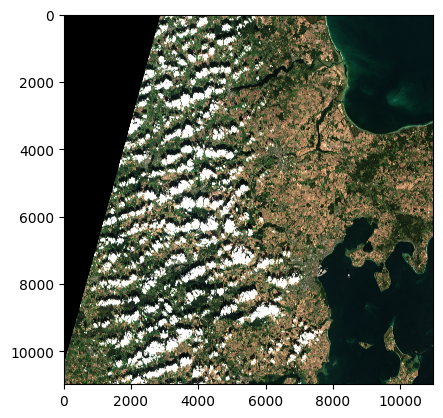

In [9]:
translate_ds = gdal.Open("./data/vrt/s2/translate/S2_32VNH_20200901.vrt")
im_data = translate_ds.ReadAsArray()

plt.imshow(np.transpose(im_data/2000, (1, 2, 0)))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


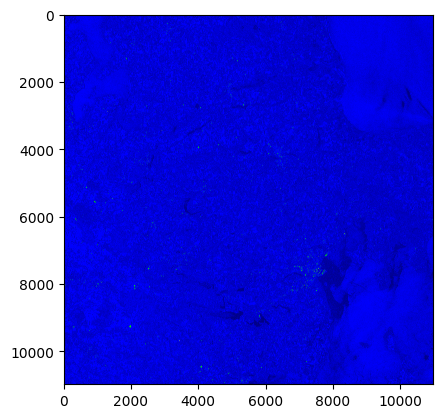

In [12]:
name = "S1_32VNH_20190404_D_139.tif"
name = "S1_32VNH_20190403_A_044.tif"
sar = gdal.Open(s1[name]["image_path"])

vrt_options = gdal.BuildVRTOptions(resolution='highest', separate=False)
gdal.BuildVRT(f"data/vrt/s1/{name}", sar, options=vrt_options)

time.sleep(1)

translate_ds = gdal.Open(f"data/vrt/s1/{name}")
im_data = translate_ds.ReadAsArray()

plt.imshow(np.transpose(im_data/2000, (1, 2, 0)))
plt.show()